In [1]:
## Imports Packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
pd.options.display.max_seq_items = 2000 ## expading all output data
from pandas.api.types import is_numeric_dtype
import scipy as sy
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

load_csv:
   
 Parameters:
 file_name - a prameter that the function gets

 Returns:
 returns a data frame

In [2]:
def load_csv(file_name):
    df = pd.read_csv(file_name, low_memory=False)
    return df

In [3]:
file_name = 'Bitter.csv'
bitter_df = load_csv(file_name)

get_number_of_rows:
    

Parameters:
dataframe - the function gets dataframe

Returns:
returns number of rows in the dataframe
    

In [4]:
def get_number_of_rows(dataframe):
    return dataframe.shape[0]

In [5]:
n_rows = get_number_of_rows(bitter_df)
print("number of rows is :", n_rows)

number of rows is : 2075


get_number_of_columns:

Parameters:
dataframe - the function gets dataframe

Returns:
returns number of columns in the dataframe

In [6]:
def get_number_of_columns(dataframe):
    return dataframe.shape[1]

In [7]:
n_cols = get_number_of_columns(bitter_df)
print("number of cols is :", n_cols)

number of cols is : 310


get_rows_in_range:

Parameters:
1. dataframe - the function gets dataframe
2. first_row - the functions gets first row
3. last_row - the function gets last row

Returns:
returns a df with the following indexes

In [8]:
def get_rows_in_range(dataframe, first_row, last_row):
    return dataframe.iloc[first_row:last_row]

get_columns_in_range

Parameters:
1. dataframe - the function gets dataframe
2. first_column - the functions gets first row
3. last_column - the function gets last row

Returns:
returns a df with the following indexes


In [9]:
def get_columns_in_range(dataframe, first_column, last_column):
    return dataframe.iloc[:, first_column:last_column]

select_rows_w_vals_in_range

Parameters:
1. dataframe - the function gets dataframe
2. col_name - the column we want to filter
3. lower_range - low range of the column
4. higher_range - high range of the column

Returns:
returns rows in a range of one column with specific values


In [10]:
def select_rows_w_vals_in_range(dataframe, col_name, lower_range, higher_range):
    return dataframe[dataframe[col_name].between(lower_range, higher_range)]

drop_columns_in_range:

Parameters:
1. dataframe - the function gets dataframe
2. lower_range - low range of the column
3. higher_range - high range of the column

Returns:
returns filtered dataframe after dropped cols in certain range


In [11]:
def drop_columns_in_range(dataframe, lower_range, higher_range):
    df_copy = dataframe.copy()
    cols = df_copy.iloc[:,lower_range:higher_range].columns
    df_copy.drop (cols,axis = 1,inplace = True)
    print("Deleted Columns:\n", cols)
    return df_copy

In [12]:
## Dropping index && name columns -- contain strings and numbers. ##
bitter_df = drop_columns_in_range(bitter_df, 0,2)
bitter_df.head()

Deleted Columns:
 Index(['Index', 'Name'], dtype='object')


,PUBCHEM_COMPOUND_CID,ACTIVITY,ID,NonBitterID,Smiles,Frequency,Canonical_Smiles,Standardize_Actions_Taken,ALogP98,ALogP98_Unknown,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
0,"7,765",Non-Bitter,NaN,1_Fnb,O(C([H])([H])C([H])([H])[H])C([H])(C([H])([H])...,1.0,CCOC(C)OCC,NaN,0.777,0.0,...,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,0.0,6.0
1,177,Non-Bitter,2_Fnb,2_Fnb,O=C([H])C([H])([H])[H],1.0,CC=O,NaN,-0.183,0.0,...,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0,0.0
2,"62,876",Non-Bitter,3_Fnb,3_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CCCCOC(C)OCCc1ccccc1,StandardizeStereo\nStandardizeStereo_ChiralFlag,3.313,0.0,...,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,0.0,19.0
3,"83,036",Non-Bitter,4_Fnb,4_Fnb,O(C([H])(C([H])([H])[H])OC([H])([H])C([H])([H]...,1.0,CC(C)CCOC(C)OCCC(C)C,NaN,3.240,0.0,...,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,0.0,12.0
4,"108,504",Non-Bitter,5_Fnb,5_Fnb,O(C([H])([H])C([H])([H])C([H])=C([H])C([H])([H...,1.0,CCOC(C)OCCC=CCC,StandardizeStereo\nStandardizeStereo_ChiralFlag,2.225,0.0,...,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,0.0,10.0


In [13]:
bitter_df = drop_columns_in_range(bitter_df,2,8)
bitter_df.head()

Deleted Columns:
 Index(['ID', 'NonBitterID', 'Smiles', 'Frequency', 'Canonical_Smiles',
       'Standardize_Actions_Taken'],
      dtype='object')


,PUBCHEM_COMPOUND_CID,ACTIVITY,ALogP98,ALogP98_Unknown,ES_Sum_aaaC,ES_Sum_aaCH,ES_Sum_aaN,ES_Sum_aaNH,ES_Sum_aaO,ES_Sum_aaS,...,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_CH,SC_3_P
0,"7,765",Non-Bitter,0.777,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,0.0,6.0
1,177,Non-Bitter,-0.183,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0,0.0
2,"62,876",Non-Bitter,3.313,0.0,0.0,10.366,0.0,0.0,0.0,0.0,...,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,0.0,19.0
3,"83,036",Non-Bitter,3.240,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,0.0,12.0
4,"108,504",Non-Bitter,2.225,0.0,0.0,0.000,0.0,0.0,0.0,0.0,...,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,0.0,10.0


drop_columns_upon_value_precentage

Parameters:
1. dataframe - the function gets dataframe
2. value - value to check

Returns:
returns filtered dataframe after dropped cols that has more than 50% values


In [14]:
def drop_columns_upon_value_precentage(dataframe, value):
    df_copy = dataframe.copy()
    columns = df_copy.columns[df_copy.eq(value).mean()>0.5]
    print("\nDeleted Columns:\n",columns)
    df_copy.drop(columns = df_copy.columns[df_copy.eq(value).mean()>0.5],axis = 1 ,inplace = True)
    return df_copy

In [15]:
bitter_df = drop_columns_upon_value_precentage(bitter_df, 0)
bitter_df = drop_columns_upon_value_precentage(bitter_df, 1)
bitter_df = drop_columns_upon_value_precentage(bitter_df, 2)
bitter_df.head()


Deleted Columns:
 Index(['ALogP98_Unknown', 'ES_Sum_aaaC', 'ES_Sum_aaCH', 'ES_Sum_aaN',
       'ES_Sum_aaNH', 'ES_Sum_aaO', 'ES_Sum_aaS', 'ES_Sum_aasC', 'ES_Sum_aaSe',
       'ES_Sum_aasN', 'ES_Sum_dCH2', 'ES_Sum_ddC', 'ES_Sum_ddsN',
       'ES_Sum_ddssS', 'ES_Sum_ddssSe', 'ES_Sum_dNH', 'ES_Sum_dS',
       'ES_Sum_dsCH', 'ES_Sum_dSe', 'ES_Sum_dsN', 'ES_Sum_dssS',
       'ES_Sum_dssSe', 'ES_Sum_dsssP', 'ES_Sum_sAsH2', 'ES_Sum_sBr',
       'ES_Sum_sCl', 'ES_Sum_sF', 'ES_Sum_sGeH3', 'ES_Sum_sI', 'ES_Sum_sLi',
       'ES_Sum_sNH2', 'ES_Sum_sNH3', 'ES_Sum_sOH', 'ES_Sum_sPbH3',
       'ES_Sum_sPH2', 'ES_Sum_ssAsH', 'ES_Sum_ssBe', 'ES_Sum_ssBH',
       'ES_Sum_sSeH', 'ES_Sum_ssGeH2', 'ES_Sum_sSH', 'ES_Sum_sSiH3',
       'ES_Sum_ssNH', 'ES_Sum_ssNH2', 'ES_Sum_sSnH3', 'ES_Sum_ssO',
       'ES_Sum_ssPbH2', 'ES_Sum_ssPH', 'ES_Sum_ssS', 'ES_Sum_sssAs',
       'ES_Sum_sssB', 'ES_Sum_sssCH', 'ES_Sum_sssdAs', 'ES_Sum_ssSe',
       'ES_Sum_sssGeH', 'ES_Sum_ssSiH2', 'ES_Sum_sssN', 'ES_Sum_sssNH',
    

,PUBCHEM_COMPOUND_CID,ACTIVITY,ALogP98,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,...,Kappa_2,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_P
0,"7,765",Non-Bitter,0.777,0.000,0.0,5.803,1.446,0,3,2,...,5.14285,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,6.0
1,177,Non-Bitter,-0.183,8.805,0.0,1.444,0.000,0,1,0,...,2.00000,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0
2,"62,876",Non-Bitter,3.313,0.000,0.0,4.116,4.727,0,2,5,...,9.07407,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,19.0
3,"83,036",Non-Bitter,3.240,0.000,0.0,10.781,3.830,0,5,4,...,8.31999,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,12.0
4,"108,504",Non-Bitter,2.225,0.000,0.0,6.017,3.537,0,3,4,...,9.09090,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,10.0


update_col_to_bin_vals:

Parameters:
1. dataframe - the function gets dataframe
2. col - the column on which we want to change its values to binary
3. value_1 - giving a value to replace 
4. value_2 - giving a value to replace 

Returns:
returns df with formated binary column


In [16]:
def update_col_to_bin_vals(dataframe, col,value_1,value_2):
    df_copy = dataframe.copy()
    df_copy[col] = df_copy[col].replace(to_replace = value_1, value = 1)
    df_copy[col] = df_copy[col].replace(to_replace = value_2, value = 0)
    print("Col changed to 1/0:",col)
    return df_copy

In [17]:
## Changing ACTIVITY col to binary values ##
bitter_df = update_col_to_bin_vals(bitter_df,"ACTIVITY","Bitter","Non-Bitter")
bitter_df.head()

Col changed to 1/0: ACTIVITY


,PUBCHEM_COMPOUND_CID,ACTIVITY,ALogP98,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,...,Kappa_2,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_P
0,"7,765",0,0.777,0.000,0.0,5.803,1.446,0,3,2,...,5.14285,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,6.0
1,177,0,-0.183,8.805,0.0,1.444,0.000,0,1,0,...,2.00000,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0
2,"62,876",0,3.313,0.000,0.0,4.116,4.727,0,2,5,...,9.07407,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,19.0
3,"83,036",0,3.240,0.000,0.0,10.781,3.830,0,5,4,...,8.31999,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,12.0
4,"108,504",0,2.225,0.000,0.0,6.017,3.537,0,3,4,...,9.09090,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,10.0


dropping_single_value_cols:

Parameters:
dataframe - the function gets dataframe

Returns:
return df without columns with single value


In [18]:
def dropping_single_value_cols(dataframe):
    df_copy = dataframe.copy()
    df_copy_cols = df_copy.loc[:,df_copy.nunique()==1].columns
    df_copy.drop(df_copy_cols,axis= 1 , inplace=True)
    print("Deleted cols:\n",df_copy_cols)
    return df_copy

In [19]:
## Dropping single value columns. ##
bitter_df = dropping_single_value_cols(bitter_df)
bitter_df.head()

Deleted cols:
 Index([], dtype='object')


,PUBCHEM_COMPOUND_CID,ACTIVITY,ALogP98,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,...,Kappa_2,Kappa_2_AM,Kappa_3,Kappa_3_AM,PHI,SC_0,SC_1,SC_2,SC_3_C,SC_3_P
0,"7,765",0,0.777,0.000,0.0,5.803,1.446,0,3,2,...,5.14285,5.06450,5.00000,4.92000,5.01386,8.0,7.0,7.0,1.0,6.0
1,177,0,-0.183,8.805,0.0,1.444,0.000,0,1,0,...,2.00000,1.67000,0.00000,0.00000,1.48630,3.0,2.0,1.0,0.0,0.0
2,"62,876",0,3.313,0.000,0.0,4.116,4.727,0,2,5,...,9.07407,8.31033,7.05817,6.36993,6.85916,16.0,16.0,18.0,2.0,19.0
3,"83,036",0,3.240,0.000,0.0,10.781,3.830,0,5,4,...,8.31999,8.24664,11.00000,10.92000,8.19952,14.0,13.0,15.0,3.0,12.0
4,"108,504",0,2.225,0.000,0.0,6.017,3.537,0,3,4,...,9.09090,8.75380,9.00000,8.65999,8.50578,12.0,11.0,11.0,1.0,10.0


dropping_nan_value_cols:
    
Parameters:
dataframe - the function gets dataframe

Returns:
return df without columns with non value


In [20]:
def dropping_nan_value_cols(dataframe):

    df_copy = dataframe.copy()
    for col in df_copy.columns:
        if df_copy[col].isnull().values.any():
            df_copy.drop(col,axis=1,inplace = True)
    print("Deleted Columns:\n",col)
    return df_copy

In [21]:
## Dropping single value columns. ##
bitter_df = dropping_nan_value_cols(bitter_df)
bitter_df.head()

Deleted Columns:
 SC_3_P


,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Formula,...,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_SurfaceArea,Molecular_PolarSurfaceArea,Molecular_FractionalPolarSurfaceArea,Molecular_SASA,Molecular_PolarSASA,Molecular_FractionalPolarSASA,Molecular_SAVol
0,0,0.000,0.0,5.803,1.446,0,3,2,0.777,C6H14O2,...,2,2,8,146.24,18.46,0.126,310.831,28.7127,0.092,265.443
1,0,8.805,0.0,1.444,0.000,0,1,0,-0.183,C2H4O,...,1,1,3,59.5,17.07,0.286,196.154,43.4905,0.221,173.012
2,0,0.000,0.0,4.116,4.727,0,2,5,3.313,C14H22O2,...,2,2,16,244.61,18.46,0.075,464.293,28.7127,0.061,399.232
3,0,0.000,0.0,10.781,3.830,0,5,4,3.240,C12H26O2,...,2,2,14,245.48,18.46,0.075,440.125,28.7127,0.065,371.588
4,0,0.000,0.0,6.017,3.537,0,3,4,2.225,C10H20O2,...,2,2,12,206.34,18.46,0.089,403.49,28.7127,0.071,345.203


dropping_object_type_cols:

Parameters:
dataframe - the function gets dataframe

Returns:
return df without columns with object type


In [22]:
def dropping_object_type_cols(dataframe):

    df_copy = dataframe.copy()
    object_cols = df_copy.select_dtypes(include='object').columns
    df_copy.drop(object_cols, axis = 1, inplace=True)
    print("Deleted Columns:\n",object_cols)
    bitter_df.head()
    return df_copy

In [23]:
## Dropping object type columns. ##
bitter_df = dropping_object_type_cols(bitter_df)
bitter_df.head()

Deleted Columns:
 Index(['Molecular_Formula', 'Molecular_Composition', 'Molecular_Weight',
       'Molecular_Mass', 'VSA_TotalArea', 'VSA_AlogP', 'VSA_MR',
       'VSA_PartialCharge', 'Molecular_SurfaceArea',
       'Molecular_PolarSurfaceArea', 'Molecular_SASA', 'Molecular_PolarSASA',
       'Molecular_SAVol'],
      dtype='object')


,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Solubility,...,Num_SingleBonds,Num_DoubleBonds,Num_AliphaticSingleBonds,Num_AliphaticDoubleBonds,Num_AtomClasses,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_FractionalPolarSurfaceArea,Molecular_FractionalPolarSASA
0,0,0.000,0.0,5.803,1.446,0,3,2,0.777,-0.883,...,7,0,7,0,5,2,2,8,0.126,0.092
1,0,8.805,0.0,1.444,0.000,0,1,0,-0.183,0.168,...,1,1,1,1,3,1,1,3,0.286,0.221
2,0,0.000,0.0,4.116,4.727,0,2,5,3.313,-4.081,...,13,3,10,0,14,2,2,16,0.075,0.061
3,0,0.000,0.0,10.781,3.830,0,5,4,3.240,-3.227,...,13,0,13,0,7,2,2,14,0.075,0.065
4,0,0.000,0.0,6.017,3.537,0,3,4,2.225,-2.739,...,10,1,10,1,12,2,2,12,0.089,0.071


outlier_detection_iqr:

Parameters:
dataframe - the function gets dataframe

Returns:
1. df with filled NaN on outlier cells
2. list of count of NaN values in each column (for create_and_caculate_data)


In [24]:
def outlier_detection_iqr(dataframe):
    list_of_counts = []
    clean_df = dataframe.copy()
    for col in clean_df:
        if is_numeric_dtype(clean_df[col]): # is numeric 
            Q1 = np.percentile(clean_df[col],25)
            Q3 = np.percentile(clean_df[col],75)
            IQR = Q3 - Q1
            IQR_range = IQR * 1.5
            clean_df.loc[ (clean_df[col] < Q1 - IQR_range) | (clean_df[col] > Q3 + IQR_range), [col]] = np.nan
            count = clean_df[col].isna().sum()
            list_of_counts.append(count)
            
    return clean_df, list_of_counts

remove_corrupt_rows:
    
Parameters:
df - the function gets dataframe

Returns:
returns a clean dataframe without rows contains NaN values

In [25]:
def remove_corrupt_rows(df):
    df2_clean = pd.DataFrame()
    df2_clean = df.dropna(axis=0,how = 'any')
    return df2_clean

In [26]:
bitter_df

,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Solubility,...,Num_SingleBonds,Num_DoubleBonds,Num_AliphaticSingleBonds,Num_AliphaticDoubleBonds,Num_AtomClasses,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_FractionalPolarSurfaceArea,Molecular_FractionalPolarSASA
0,0,0.000,0.000,5.803,1.446,0,3,2,0.777,-0.883,...,7,0,7,0,5,2,2,8,0.126,0.092
1,0,8.805,0.000,1.444,0.000,0,1,0,-0.183,0.168,...,1,1,1,1,3,1,1,3,0.286,0.221
2,0,0.000,0.000,4.116,4.727,0,2,5,3.313,-4.081,...,13,3,10,0,14,2,2,16,0.075,0.061
3,0,0.000,0.000,10.781,3.830,0,5,4,3.240,-3.227,...,13,0,13,0,7,2,2,14,0.075,0.065
4,0,0.000,0.000,6.017,3.537,0,3,4,2.225,-2.739,...,10,1,10,1,12,2,2,12,0.089,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,1,36.782,-0.394,4.207,3.853,1,2,5,0.042,-3.695,...,15,6,12,3,17,3,5,20,0.235,0.213
2071,1,37.452,-0.384,4.310,7.512,1,2,8,1.998,-5.098,...,18,6,15,3,18,3,5,23,0.201,0.185
2072,1,45.280,0.356,3.781,1.224,1,2,2,0.769,-2.954,...,13,7,10,4,16,6,7,19,0.394,0.357
2073,1,12.746,0.384,6.639,6.556,1,3,10,0.975,-4.108,...,37,1,37,1,33,8,8,34,0.290,0.354


create_and_caculate_data:

Parameters:
dataframe - the function gets dataframe

Returns:
returns a new dataframe contains mean, std, count of outliers in each column (before calling remove_corrupt_rows)


In [27]:
def create_and_caculate_data(df, list_of_outliers):
    df2 = df.copy()
    mean = []
    std = []
    list_of_lists = []
    index_col = df.columns
    
    for col in df2.columns:
        mean.append(df2[col].mean()) 
        std.append(df2[col].std())
    list_of_lists.append(mean)
    list_of_lists.append(std)
    list_of_lists.append(list_of_outliers)
    new_df = pd.DataFrame(list_of_lists, index = ['Mean', 'Std', 'Count_of_Outliers'], columns = index_col)
    return new_df

In [28]:
bitter_df, listi = outlier_detection_iqr(bitter_df)
create_and_caculate_data(bitter_df, listi)

,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Solubility,...,Num_SingleBonds,Num_DoubleBonds,Num_AliphaticSingleBonds,Num_AliphaticDoubleBonds,Num_AtomClasses,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_FractionalPolarSurfaceArea,Molecular_FractionalPolarSASA
Mean,0.263614,8.604765,-0.084597,3.267763,2.079960,0.786559,1.780583,2.499745,2.097949,-2.569398,...,9.720846,2.932906,8.115148,1.250390,11.122826,2.246185,2.249474,12.768676,0.209871,0.191427
Std,0.440699,6.884353,0.189684,2.376381,2.354367,0.688905,1.313586,2.135089,1.409871,1.428870,...,4.248841,2.057524,4.138729,0.923057,4.087027,1.289386,1.406700,4.836669,0.120733,0.100130
Count_of_Outliers,0.000000,163.000000,616.000000,64.000000,105.000000,215.000000,15.000000,116.000000,100.000000,69.000000,...,137.000000,48.000000,121.000000,150.000000,178.000000,109.000000,175.000000,134.000000,74.000000,95.000000


In [29]:
bitter_df

,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Solubility,...,Num_SingleBonds,Num_DoubleBonds,Num_AliphaticSingleBonds,Num_AliphaticDoubleBonds,Num_AtomClasses,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_FractionalPolarSurfaceArea,Molecular_FractionalPolarSASA
0,0.0,0.000,0.000,5.803,1.446,0.0,3.0,2.0,0.777,-0.883,...,7.0,0.0,7.0,0.0,5.0,2.0,2.0,8.0,0.126,0.092
1,0.0,8.805,0.000,1.444,0.000,0.0,1.0,0.0,-0.183,0.168,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,0.286,0.221
2,0.0,0.000,0.000,4.116,4.727,0.0,2.0,5.0,3.313,-4.081,...,13.0,3.0,10.0,0.0,14.0,2.0,2.0,16.0,0.075,0.061
3,0.0,0.000,0.000,NaN,3.830,0.0,5.0,4.0,3.240,-3.227,...,13.0,0.0,13.0,0.0,7.0,2.0,2.0,14.0,0.075,0.065
4,0.0,0.000,0.000,6.017,3.537,0.0,3.0,4.0,2.225,-2.739,...,10.0,1.0,10.0,1.0,12.0,2.0,2.0,12.0,0.089,0.071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2070,1.0,NaN,-0.394,4.207,3.853,1.0,2.0,5.0,0.042,-3.695,...,15.0,6.0,12.0,3.0,17.0,3.0,5.0,20.0,0.235,0.213
2071,1.0,NaN,-0.384,4.310,7.512,1.0,2.0,8.0,1.998,-5.098,...,18.0,6.0,15.0,3.0,18.0,3.0,5.0,23.0,0.201,0.185
2072,1.0,NaN,0.356,3.781,1.224,1.0,2.0,2.0,0.769,-2.954,...,13.0,7.0,10.0,NaN,16.0,6.0,NaN,19.0,0.394,0.357
2073,1.0,12.746,0.384,6.639,6.556,1.0,3.0,NaN,0.975,-4.108,...,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,0.290,0.354


After calculating the mean, std and count of outliers in each column
NaN rows is deleted

In [30]:
# delete NaN
bitter_df = remove_corrupt_rows(bitter_df)
bitter_df.reset_index(drop=True)

,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Solubility,...,Num_SingleBonds,Num_DoubleBonds,Num_AliphaticSingleBonds,Num_AliphaticDoubleBonds,Num_AtomClasses,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_FractionalPolarSurfaceArea,Molecular_FractionalPolarSASA
0,0.0,0.000,0.0,5.803,1.446,0.0,3.0,2.0,0.777,-0.883,...,7.0,0.0,7.0,0.0,5.0,2.0,2.0,8.0,0.126,0.092
1,0.0,8.805,0.0,1.444,0.000,0.0,1.0,0.0,-0.183,0.168,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,0.286,0.221
2,0.0,0.000,0.0,4.116,4.727,0.0,2.0,5.0,3.313,-4.081,...,13.0,3.0,10.0,0.0,14.0,2.0,2.0,16.0,0.075,0.061
3,0.0,0.000,0.0,6.017,3.537,0.0,3.0,4.0,2.225,-2.739,...,10.0,1.0,10.0,1.0,12.0,2.0,2.0,12.0,0.089,0.071
4,0.0,0.000,0.0,4.039,3.466,0.0,2.0,4.0,2.857,-3.585,...,12.0,3.0,9.0,0.0,13.0,2.0,2.0,15.0,0.080,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.097,0.968,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,0.533,0.336
1105,1.0,0.000,0.0,0.000,-0.473,0.0,0.0,1.0,-0.342,-1.067,...,16.0,3.0,13.0,0.0,16.0,6.0,6.0,18.0,0.411,0.404
1106,1.0,20.687,0.0,0.000,4.961,0.0,0.0,5.0,-1.416,-1.498,...,9.0,2.0,9.0,2.0,8.0,3.0,4.0,11.0,0.466,0.380
1107,1.0,24.349,0.0,0.000,0.000,0.0,0.0,0.0,1.439,-2.991,...,10.0,8.0,4.0,2.0,7.0,4.0,4.0,17.0,0.411,0.441


In [31]:
bitter_df.reset_index(drop=True)

,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Solubility,...,Num_SingleBonds,Num_DoubleBonds,Num_AliphaticSingleBonds,Num_AliphaticDoubleBonds,Num_AtomClasses,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_FractionalPolarSurfaceArea,Molecular_FractionalPolarSASA
0,0.0,0.000,0.0,5.803,1.446,0.0,3.0,2.0,0.777,-0.883,...,7.0,0.0,7.0,0.0,5.0,2.0,2.0,8.0,0.126,0.092
1,0.0,8.805,0.0,1.444,0.000,0.0,1.0,0.0,-0.183,0.168,...,1.0,1.0,1.0,1.0,3.0,1.0,1.0,3.0,0.286,0.221
2,0.0,0.000,0.0,4.116,4.727,0.0,2.0,5.0,3.313,-4.081,...,13.0,3.0,10.0,0.0,14.0,2.0,2.0,16.0,0.075,0.061
3,0.0,0.000,0.0,6.017,3.537,0.0,3.0,4.0,2.225,-2.739,...,10.0,1.0,10.0,1.0,12.0,2.0,2.0,12.0,0.089,0.071
4,0.0,0.000,0.0,4.039,3.466,0.0,2.0,4.0,2.857,-3.585,...,12.0,3.0,9.0,0.0,13.0,2.0,2.0,15.0,0.080,0.065
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1.0,0.000,0.0,0.000,0.000,0.0,0.0,0.0,0.097,0.968,...,0.0,0.0,0.0,0.0,2.0,1.0,1.0,2.0,0.533,0.336
1105,1.0,0.000,0.0,0.000,-0.473,0.0,0.0,1.0,-0.342,-1.067,...,16.0,3.0,13.0,0.0,16.0,6.0,6.0,18.0,0.411,0.404
1106,1.0,20.687,0.0,0.000,4.961,0.0,0.0,5.0,-1.416,-1.498,...,9.0,2.0,9.0,2.0,8.0,3.0,4.0,11.0,0.466,0.380
1107,1.0,24.349,0.0,0.000,0.000,0.0,0.0,0.0,1.439,-2.991,...,10.0,8.0,4.0,2.0,7.0,4.0,4.0,17.0,0.411,0.441


### Create a clean CSV file (before normalize)

In [32]:
bitter_df.to_csv("bitter_cleaned.csv",index=False)

normalize:

Parameters:
dataframe - the function gets dataframe

Returns:
returns a dataframe after normalizing each column with minmax[0, 1]

In [33]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [34]:
bitter_df = normalize(bitter_df)
bitter_df.reset_index(drop = True)

,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,ES_Count_dssC,ES_Count_sCH3,ES_Count_ssCH2,LogD,Molecular_Solubility,...,Num_SingleBonds,Num_DoubleBonds,Num_AliphaticSingleBonds,Num_AliphaticDoubleBonds,Num_AtomClasses,Num_H_Acceptors,Num_H_Acceptors_Lipinski,Organic_Count,Molecular_FractionalPolarSurfaceArea,Molecular_FractionalPolarSASA
0,0.0,0.000000,0.624422,0.610585,0.241890,0.0,0.6,0.250,0.375880,0.746993,...,0.318182,0.000,0.35,0.000000,0.15,0.333333,0.333333,0.260870,0.224199,0.191667
1,0.0,0.357680,0.624422,0.151936,0.105526,0.0,0.2,0.000,0.235035,0.890651,...,0.045455,0.125,0.05,0.333333,0.05,0.166667,0.166667,0.043478,0.508897,0.460417
2,0.0,0.000000,0.624422,0.433081,0.551301,0.0,0.4,0.625,0.747946,0.309869,...,0.590909,0.375,0.50,0.000000,0.60,0.333333,0.333333,0.608696,0.133452,0.127083
3,0.0,0.000000,0.624422,0.633102,0.439080,0.0,0.6,0.500,0.588322,0.493302,...,0.454545,0.125,0.50,0.333333,0.50,0.333333,0.333333,0.434783,0.158363,0.147917
4,0.0,0.000000,0.624422,0.424979,0.432384,0.0,0.4,0.500,0.681045,0.377665,...,0.545455,0.375,0.45,0.000000,0.55,0.333333,0.333333,0.565217,0.142349,0.135417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1.0,0.000000,0.624422,0.000000,0.105526,0.0,0.0,0.000,0.276115,1.000000,...,0.000000,0.000,0.00,0.000000,0.00,0.166667,0.166667,0.000000,0.948399,0.700000
1105,1.0,0.000000,0.624422,0.000000,0.060920,0.0,0.0,0.125,0.211708,0.721843,...,0.727273,0.375,0.65,0.000000,0.70,1.000000,1.000000,0.695652,0.731317,0.841667
1106,1.0,0.840354,0.624422,0.000000,0.573369,0.0,0.0,0.625,0.054137,0.662931,...,0.409091,0.250,0.45,0.666667,0.30,0.500000,0.666667,0.391304,0.829181,0.791667
1107,1.0,0.989113,0.624422,0.000000,0.105526,0.0,0.0,0.000,0.473005,0.458857,...,0.454545,1.000,0.20,0.666667,0.25,0.666667,0.666667,0.652174,0.731317,0.918750


correlation:

Parameters:
dataframe - the function gets dataframe

Returns:
returns a normalize dataframe and correlat it with 'pearson' method

In [35]:
def correlation(dataframe):
    df = dataframe.copy()
    # Create correlation matrix
    corr_matrix = df.corr(method='pearson').abs()

    # Select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

    # Find features with correlation greater than 0.8
    to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]

    # Drop features 
    df.drop(to_drop, axis=1, inplace=True)
    
    return df

In [36]:
bitter_df = correlation(bitter_df)
bitter_df.reset_index(drop = True)

<ipython-input-35-167bd1050a78>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,ACTIVITY,ES_Sum_dO,ES_Sum_dssC,ES_Sum_sCH3,ES_Sum_ssCH2,LogD,Molecular_Solubility,HBA_Count,NPlusO_Count,Num_Atoms,Num_Hydrogens,Num_RingBonds,Num_RotatableBonds,Num_DoubleBonds,Num_AliphaticDoubleBonds,Num_H_Acceptors,Molecular_FractionalPolarSurfaceArea
0,0.0,0.000000,0.624422,0.610585,0.241890,0.375880,0.746993,0.666667,0.333333,0.260870,0.482759,0.000000,0.4,0.000,0.000000,0.333333,0.224199
1,0.0,0.357680,0.624422,0.151936,0.105526,0.235035,0.890651,0.333333,0.166667,0.043478,0.137931,0.000000,0.0,0.125,0.333333,0.166667,0.508897
2,0.0,0.000000,0.624422,0.433081,0.551301,0.747946,0.309869,0.666667,0.333333,0.608696,0.758621,0.352941,0.8,0.375,0.000000,0.333333,0.133452
3,0.0,0.000000,0.624422,0.633102,0.439080,0.588322,0.493302,0.666667,0.333333,0.434783,0.689655,0.000000,0.7,0.125,0.333333,0.333333,0.158363
4,0.0,0.000000,0.624422,0.424979,0.432384,0.681045,0.377665,0.666667,0.333333,0.565217,0.689655,0.352941,0.7,0.375,0.000000,0.333333,0.142349
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1104,1.0,0.000000,0.624422,0.000000,0.105526,0.276115,1.000000,0.000000,0.166667,0.000000,0.034483,0.000000,0.0,0.000,0.000000,0.166667,0.948399
1105,1.0,0.000000,0.624422,0.000000,0.060920,0.211708,0.721843,0.666667,1.000000,0.695652,0.551724,0.705882,0.3,0.375,0.000000,1.000000,0.731317
1106,1.0,0.840354,0.624422,0.000000,0.573369,0.054137,0.662931,0.000000,0.666667,0.391304,0.413793,0.352941,0.2,0.250,0.666667,0.500000,0.829181
1107,1.0,0.989113,0.624422,0.000000,0.105526,0.473005,0.458857,0.666667,0.666667,0.652174,0.413793,0.705882,0.2,1.000,0.666667,0.666667,0.731317


heat_map:

Parameters:
dataframe - the function gets dataframe

Returns:
returns a heatmap with the normalize dataframe after correlation with 'pearson' method

In [37]:
def heat_map(dataframe):
    return sns.heatmap(dataframe.corr(method='pearson'), vmin=0, vmax=1, annot=False, linewidth=5)

### Heat map:

<AxesSubplot:>

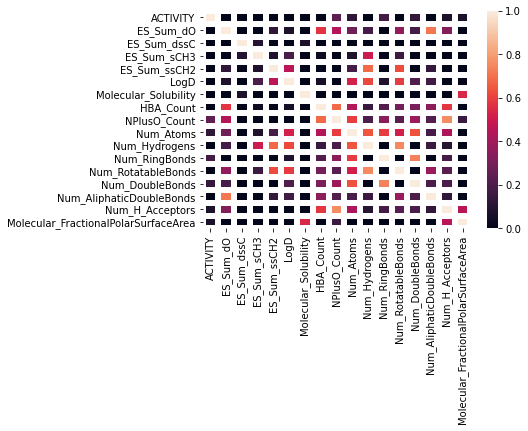

In [38]:
heat_map(bitter_df)

histogram:
    
Parameters:
dataframe - the function gets dataframe

Returns:
returns an histogram for each column in the dataframe

In [39]:
def histogram(dataframe):
    df = dataframe.copy()
    return df.hist(bins = 7, figsize=(15, 15), grid=True)

### Histogram for each column:

array([[<AxesSubplot:title={'center':'ACTIVITY'}>,
        <AxesSubplot:title={'center':'ES_Sum_dO'}>,
        <AxesSubplot:title={'center':'ES_Sum_dssC'}>,
        <AxesSubplot:title={'center':'ES_Sum_sCH3'}>],
       [<AxesSubplot:title={'center':'ES_Sum_ssCH2'}>,
        <AxesSubplot:title={'center':'LogD'}>,
        <AxesSubplot:title={'center':'Molecular_Solubility'}>,
        <AxesSubplot:title={'center':'HBA_Count'}>],
       [<AxesSubplot:title={'center':'NPlusO_Count'}>,
        <AxesSubplot:title={'center':'Num_Atoms'}>,
        <AxesSubplot:title={'center':'Num_Hydrogens'}>,
        <AxesSubplot:title={'center':'Num_RingBonds'}>],
       [<AxesSubplot:title={'center':'Num_RotatableBonds'}>,
        <AxesSubplot:title={'center':'Num_DoubleBonds'}>,
        <AxesSubplot:title={'center':'Num_AliphaticDoubleBonds'}>,
        <AxesSubplot:title={'center':'Num_H_Acceptors'}>],
       [<AxesSubplot:title={'center':'Molecular_FractionalPolarSurfaceArea'}>,
        <AxesSubplot:>, <A

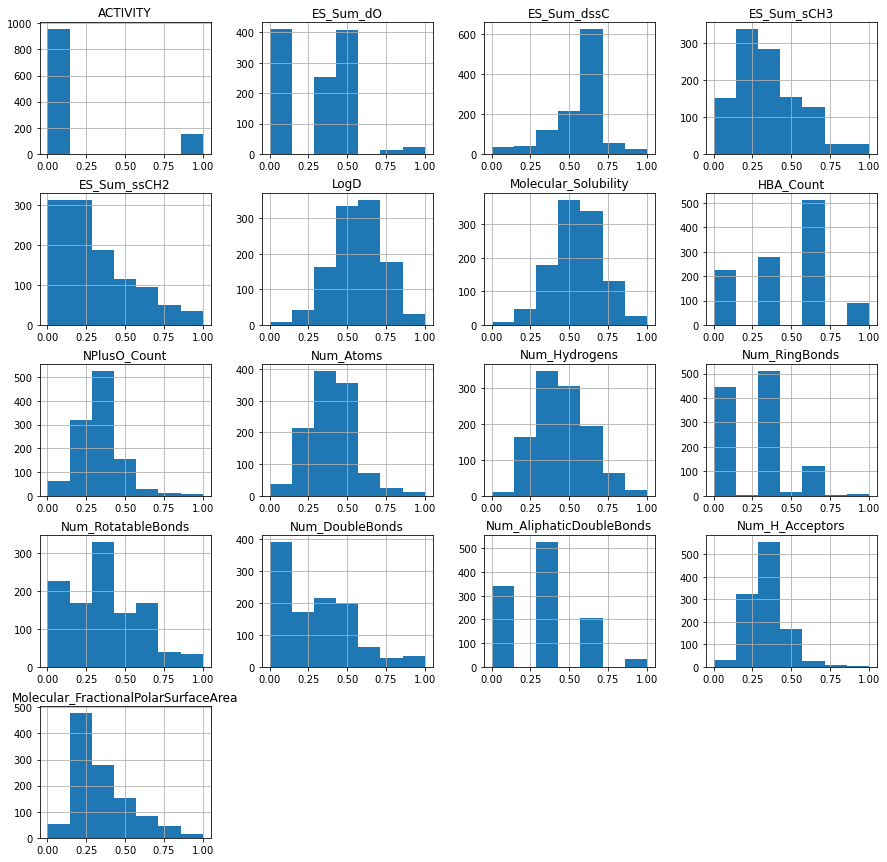

In [40]:
histogram(bitter_df)

### Create a clean and normalize CSV file ☺

In [41]:
bitter_df.to_csv("normalize_bitter_cleaned.csv",index=False)